# 휴먼지능정보공학과 201810808 정민지

## 문제: k-Means 클러스터링

```sklearn.datasets.make_blobs``` 에서 데이터를 생성하고, 클러스터링하세요.
클러스터는 4개로 설정한다.
Python으로 구현한다. 단, 위 코드를 한 군데 수정해야 한다.

클러스터의 중심점을 몇 회만에 찾는지, 중심값을 출력하세요.
배정된 클러스터와 y값을 비교해서 동일한지 확인하세요.

Parameters
* n_samples: 샘플 갯수 (기본 값은 100)
* n_features: features 갯수 (기본 값은 2)
* centers: 중심점 갯수
* cluster_std: 클러스터 표준편차 (기본 값은 1.0)
* random_state: 기본 값은 None
Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls. See Glossary.

반환:
* X 배열 [n_samples, n_features]
* y: 배정된 클러스터 The generated samples.

In [5]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

### 이 데이터를 4개의 클러스터로 군집화하세요
---

#### 함수 선언

In [9]:
def normDist(x1, x2):
    #dist=np.sqrt(sum(np.power(x1 - x2, 2))) #36.406001444695193 #식으로 구하기
    dist = np.linalg.norm(x1 - x2) #36.406001444695193
    return dist

In [12]:
def draw(x, centroids):
    import matplotlib.pyplot as plt
    #plt.subplot(5,2,iter)
    plt.scatter(x[:,0], x[:,1], color='blue')
    plt.scatter(centroids[:,0], centroids[:,1], color='red')

In [76]:
def cluster(x, k, centroids): #x,k, 초기중심점
    row, col = x.shape
    clusterAssigned = np.zeros(shape=(row, col), dtype=float) #수정부분
    # print (clusterAssigned)
    clusterUpdated=True
    iter = 1
    while(clusterUpdated):
        print ("\n\n====== Iteration {} ======".format(iter))
        # STEP 1: assign to closer cluster
        for i in range(row):
            minDist = np.inf   # set arbitray max to minDist
            minIndex = -1      # set arbitray index to minIndex
            # compute distance and assign to closer cluster
            for j in range(k):
                # distance from centroids[j] to x[0]
                distJI = normDist(centroids[j], x[i])
                # print ("Distance {:.3f} between {} and {}".format(distJI, centroids[j], x[i]))
                # pick the closest centroid
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            #print (".....Assigning {} to {}th centroid by {:.3f}".format(x[i], minIndex, minDist))
            clusterAssigned[i] = [minIndex, minDist]   #-----changed
        #print ("\n.....Assigned clusters: \n {}".format(clusterAssigned))
        
        # STEP 2: update centroids
        _centroids=np.zeros(shape = (k, x.shape[1]), dtype=float)
        for cent in range(k):
            # read data by index and average them
            _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)
        # print ("Centroids updated: \n", _centroids)
        
        # STEP 3: see if centroids is updated. STOP if NOT updated
        comparison = np.equal(centroids, _centroids) # np.isclose() in case some tolerence is required
        if(comparison.all() == True):
            print ("\n.....NOT Updating Centroids!!\n")# {} => \n{}".format(centroids, _centroids))
            print("\n-----Final Centroids is...\n{}\n".format(_centroids))
            print("\n We found Centroids at {} times.\n".format(iter))
            clusterUpdated = False
            return centroids, clusterAssigned
        else:
            #print ("\n.....Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            if iter==1:
                print("\n Init Centroids is...\n{}".format(centroids))
            print ("\n.....Updating Centroids To..\n{}".format(_centroids))
            centroids = _centroids
            iter += 1

---
### (1) 클러스터의 중심점을 몇 회만에 찾는지, 매 반복 중심값만을 출력한다.

#### 중복없이 배열에서 랜덤 4개 추출

In [260]:
import random
randlist=random.sample(range(100), 4)
print(randlist)

[1, 74, 68, 63]




====== Iteration 1 ======

 Init Centroids is...
[[-2.02396992  7.99569054]
 [ 1.00372519  4.19147702]
 [ 2.18023251  1.48364708]
 [ 1.89593761  5.18540259]]

.....Updating Centroids To..
[[-1.27208964  7.74944718]
 [-0.39419316  3.65452105]
 [ 1.97918933  0.97920012]
 [ 1.55769277  5.12898975]]


====== Iteration 2 ======

.....Updating Centroids To..
[[-1.27208964  7.74944718]
 [-0.99280343  3.39499447]
 [ 1.97918933  0.97920012]
 [ 1.24383227  4.48247791]]


====== Iteration 3 ======

.....Updating Centroids To..
[[-1.27208964  7.74944718]
 [-1.25872549  3.25396018]
 [ 1.97918933  0.97920012]
 [ 1.07852567  4.41831492]]


====== Iteration 4 ======

.....Updating Centroids To..
[[-1.27208964  7.74944718]
 [-1.43468106  3.216216  ]
 [ 1.97918933  0.97920012]
 [ 0.97698781  4.3136601 ]]


====== Iteration 5 ======

.....Updating Centroids To..
[[-1.27208964  7.74944718]
 [-1.52704861  3.14337865]
 [ 1.97918933  0.97920012]
 [ 0.87673717  4.2964758 ]]


====== Iteration 6 ======

....

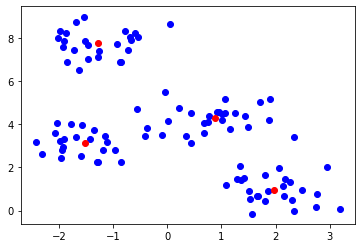

In [261]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


k = 4

#centroids=np.array(X[randlist[0]],X[randlist[1]],X[randlist[2]],X[randlist[3]],dtype=float)
centroids = np.array([[X[randlist[0],0],X[randlist[0],1]],[X[randlist[1],0],X[randlist[1],1]],[X[randlist[2],0],X[randlist[2],1]],[X[randlist[3],0],X[randlist[3],1]]], dtype=float)
centroids, clusterAssigned = cluster(X, k, centroids)
draw(X, centroids)

---

### (2) 배정된 클러스터가 맞는지 비교하여 동일한지 확인하세요.

#### 출력

In [262]:
print(y)

[0 3 0 0 0 0 2 3 0 3 3 3 3 3 3 1 1 2 2 1 0 3 2 1 0 2 2 0 1 1 1 3 1 1 2 0 3
 1 3 2 0 2 3 2 2 3 1 2 0 0 0 1 2 2 2 3 3 1 1 3 3 1 1 0 1 3 2 2 1 0 3 1 0 3
 0 0 2 2 1 1 1 3 2 0 1 2 1 1 0 0 0 2 0 2 2 3 3 2 3 0]


In [263]:
print(clusterAssigned[:,0])

[3. 0. 3. 3. 3. 3. 1. 0. 3. 0. 0. 0. 0. 0. 0. 2. 2. 3. 1. 2. 3. 0. 1. 2.
 3. 1. 1. 3. 2. 2. 2. 0. 2. 2. 1. 3. 0. 2. 0. 1. 3. 1. 0. 1. 1. 0. 2. 1.
 3. 3. 3. 2. 1. 1. 1. 0. 0. 2. 2. 0. 0. 2. 2. 3. 2. 0. 1. 1. 2. 3. 0. 2.
 3. 0. 3. 3. 1. 1. 2. 2. 2. 0. 1. 3. 2. 1. 2. 2. 3. 3. 3. 1. 3. 1. 1. 0.
 0. 1. 0. 3.]


#### 클러스터 id가 달라서 이를 변환

In [264]:
compareCluster=np.array([])

for i in range(len(clusterAssigned[:,0])):
    if clusterAssigned[:,0][i]==0:
        compareCluster=np.append(compareCluster,3)
        
    elif clusterAssigned[:,0][i]==1:
        compareCluster=np.append(compareCluster,2)
        
    elif clusterAssigned[:,0][i]==2: 
        compareCluster=np.append(compareCluster,1)
        
    else: #clusterAssigned[:,0][i]==3
        compareCluster=np.append(compareCluster,0)

In [281]:
compareCluster

array([0., 3., 0., 0., 0., 0., 2., 3., 0., 3., 3., 3., 3., 3., 3., 1., 1.,
       0., 2., 1., 0., 3., 2., 1., 0., 2., 2., 0., 1., 1., 1., 3., 1., 1.,
       2., 0., 3., 1., 3., 2., 0., 2., 3., 2., 2., 3., 1., 2., 0., 0., 0.,
       1., 2., 2., 2., 3., 3., 1., 1., 3., 3., 1., 1., 0., 1., 3., 2., 2.,
       1., 0., 3., 1., 0., 3., 0., 0., 2., 2., 1., 1., 1., 3., 2., 0., 1.,
       2., 1., 1., 0., 0., 0., 2., 0., 2., 2., 3., 3., 2., 3., 0.])

#### 비교 dataframe 생성

In [285]:
import pandas as pd
df=pd.DataFrame({'orgin':y,'cluster assigned':compareCluster})

In [288]:
df['compare result']=df['orgin']==df['cluster assigned']

In [289]:
df

,orgin,cluster assigned,compare result
0,0,0.0,True
1,3,3.0,True
2,0,0.0,True
3,0,0.0,True
4,0,0.0,True
...,...,...,...
95,3,3.0,True
96,3,3.0,True
97,2,2.0,True
98,3,3.0,True


#### 다른 것 츨력

In [290]:
df[df['compare result']==False]

,orgin,cluster assigned,compare result
17,2,0.0,False


- random 번호를 바꾸어서도 해보았으나, **X의 17번 항목이 계속해서 cluster 0에 배정됨.**

#### 거리 비교

In [291]:
X[17]

array([-0.09701715,  3.48456995])

In [295]:
import math
 
class Point2D:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
blob = Point2D(x=X[17][0], y=X[17][1])    # 제대로 나오지 않은 값
p1 = Point2D(x=centroids[1][0], y=centroids[1][1])    # make_blobs에서 생성한 군집의 cluster id와 비교. 2->1
p2 = Point2D(x=centroids[3][0], y=centroids[3][1])    # k-means를 통해 생성한 군집의 cluster id. 0->3

# 거리 1: cluster 2(id 3으로 수정됨)의 중심과 X의 17번째 항목
a1 = p1.x - blob.x 
b1 = p1.y - blob.y 
c1 = math.sqrt((a1 * a1) + (b1 * b1)) 

# 거리 2: cluster 0(id 1로 수정됨)의 중심과 X의 17번째 항목
a2 = p2.x - blob.x 
b2 = p2.y - blob.y 
c2 = math.sqrt((a2 * a2) + (b2 * b2)) 

print(c1) # y
print(c2) # k-means 결과 배정된 cluster

1.4701705607159918
1.267828293548772


- 거리를 비교해보니 cluster0과 거리가 더 가까워서 0번이 할당되었음을 알 수 있다.